<h1>Collaborative Filtering Method using Kmeans</h1>

In [1]:
from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dataAnalysisFuncts as DA
import preprocessingFuncts as pp
import sklearn.metrics as metrics

from models import KmeansCF

In [2]:
IBCF = KmeansCF('item')
IBCF.fit('ml-100k\\ua.base')


In [3]:
IBCF.baseSimMatrix

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,1.000000,0.999915,0.993777,0.996066,0.998006,0.990220,0.995284,0.996844,0.990220,0.981568,...,0.996889,0.388229,0.981019,0.981019,0.981019,0.942754,0.941762,0.942198,0.980519,0.981019
2,0.999915,1.000000,0.993743,0.996034,0.997971,0.990187,0.995251,0.996810,0.990187,0.981594,...,0.996857,0.388191,0.981037,0.981037,0.981037,0.942791,0.941799,0.942235,0.980488,0.981037
3,0.993777,0.993743,1.000000,0.997708,0.995766,0.996442,0.998491,0.996932,0.996442,0.980658,...,0.996886,0.384896,0.981439,0.981439,0.981439,0.940451,0.939255,0.939781,0.980579,0.981439
4,0.996066,0.996034,0.997708,1.000000,0.998053,0.994152,0.999213,0.999218,0.994152,0.981276,...,0.999176,0.386056,0.981576,0.981576,0.981576,0.941413,0.940288,0.940783,0.980740,0.981576
5,0.998006,0.997971,0.995766,0.998053,1.000000,0.992212,0.997270,0.998832,0.992212,0.981591,...,0.998871,0.387136,0.981470,0.981470,0.981470,0.942167,0.941105,0.941572,0.980661,0.981470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.942754,0.942791,0.940451,0.941413,0.942167,0.938985,0.941043,0.941682,0.938985,0.959587,...,0.941683,0.359841,0.957594,0.957594,0.957594,1.000000,0.997635,0.998680,0.923466,0.957594
1679,0.941762,0.941799,0.939255,0.940288,0.941105,0.937684,0.939894,0.940583,0.937684,0.958263,...,0.940585,0.360879,0.956115,0.956115,0.956115,0.997635,1.000000,0.998955,0.922569,0.956115
1680,0.942198,0.942235,0.939781,0.940783,0.941572,0.938256,0.940399,0.941066,0.938256,0.958849,...,0.941068,0.360413,0.956768,0.956768,0.956768,0.998680,0.998955,1.000000,0.922961,0.956768
1681,0.980519,0.980488,0.980579,0.980740,0.980661,0.979632,0.980770,0.980773,0.979632,0.962259,...,0.980793,0.398703,0.962318,0.962318,0.962318,0.923466,0.922569,0.922961,1.000000,0.962318


In [4]:
testData = pp.readRatingData('ml-100k\\ua.test')
testX, testY = testData.loc[:, ['user_id',
                                'item_id']], testData.loc[:, 'rating']

predY = IBCF.predict(testX)
print(predY)

[3, 3, 3, 4, 3, 4, 3, 4, 3, 4, 4, 3, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 3, 3, 3, 3, 3, 4, 5, 4, 4, 4, 4, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4, 4, 3, 2, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 4, 3, 4, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3, 3, 5, 2, 3, 5, 3, 4, 4, 4, 4, 3, 3, 4, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 5, 4, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 4, 4, 4, 3, 3, 2, 3, 3, 4, 5, 3, 4, 4, 4, 3, 4, 4, 3, 3, 1, 4, 3, 2, 3, 5, 4, 4, 4, 4, 4, 3, 3, 4, 3, 0, 3, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4, 2, 0, 5, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 4, 2, 3, 4, 2, 3, 4, 3, 4, 2, 5, 3, 4, 2, 4, 0, 5, 4, 4, 4, 4, 3, 4, 3, 5, 4, 3, 3, 4, 4, 3, 4, 3, 3, 3, 0, 3, 3, 3, 4, 4, 5, 4, 4, 3, 4, 4, 1, 3, 2, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 2, 3, 0, 0, 4, 3, 4, 3, 3, 3, 3, 4, 2, 0, 3, 4, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 4, 4, 5, 4, 3, 3, 4, 0, 4, 1, 3, 4, 2, 3, 4, 4, 5, 0, 3, 2, 4, 5, 3, 3, 3, 3, 3, 4, 5, 3, 3, 4, 4, 3, 3, 4, 4, 0, 4, 4, 4, 3, 3, 3, 5, 3, 3, 4, 4, 4, 4, 

In [5]:
from sklearn.metrics import classification_report

print(classification_report(testY, predY))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.02      0.00      0.01       542
           2       0.10      0.05      0.06       995
           3       0.26      0.34      0.30      2424
           4       0.36      0.48      0.41      3316
           5       0.25      0.08      0.13      2153

    accuracy                           0.28      9430
   macro avg       0.17      0.16      0.15      9430
weighted avg       0.27      0.28      0.26      9430



c:\Users\scarl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


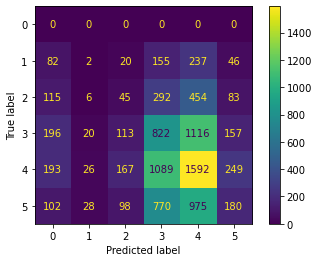

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(
    testY, predY, labels=[0, 1, 2, 3, 4, 5]
)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4, 5])
disp.plot()
plt.show()


<h1>User Based</h1>

In [7]:
UBCF = KmeansCF('user')
UBCF.fit('ml-100k\\ua.base')
predY = UBCF.predict(testX)

print(classification_report(testY, predY))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.30      0.02      0.03       542
           2       0.22      0.14      0.17       995
           3       0.29      0.43      0.35      2424
           4       0.38      0.53      0.44      3316
           5       0.39      0.10      0.16      2153

    accuracy                           0.34      9430
   macro avg       0.27      0.20      0.19      9430
weighted avg       0.34      0.34      0.30      9430



c:\Users\scarl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


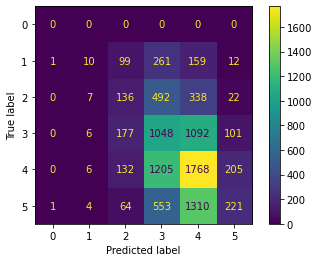

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(
    testY, predY, labels=[0, 1, 2, 3, 4, 5]
)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4, 5])
disp.plot()
plt.show()


In [14]:
#Adding parameters to the model

UBCF = KmeansCF('user',k=10,threshold=3,metric='kendall')
UBCF.fit('ml-100k\\ua.base')
predY = UBCF.predict(testX)

print(classification_report(testY, predY))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.39      0.02      0.03       542
           2       0.25      0.12      0.16       995
           3       0.30      0.44      0.36      2424
           4       0.38      0.59      0.47      3316
           5       0.45      0.05      0.09      2153

    accuracy                           0.35      9430
   macro avg       0.30      0.20      0.19      9430
weighted avg       0.36      0.35      0.30      9430



c:\Users\scarl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


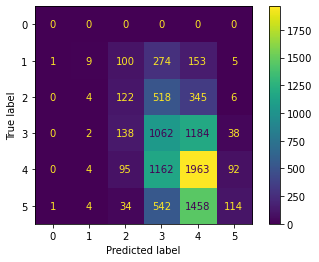

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(
    testY, predY, labels=[0, 1, 2, 3, 4, 5]
)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4, 5])
disp.plot()
plt.show()